In [1]:
import pandas as pd
import os
import seaborn as sns

In [20]:
flat_df = pd.read_csv("flat/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
flat_df["hierarchy"] = "flat"
samples_df = pd.read_csv("samples/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
samples_df = samples_df[samples_df["n"] == 1050]
samples_df["hierarchy"] = "normal"
flat_df = pd.concat([flat_df, samples_df])
flat_df = flat_df[(flat_df["Method"].isin(["RF","SPH", "SPH+CPI", "CPI"]))]
flat_df["Method"] = pd.Categorical(flat_df["Method"], ['RF','SPH', 'SPH+CPI', 'CPI'], ordered=True)

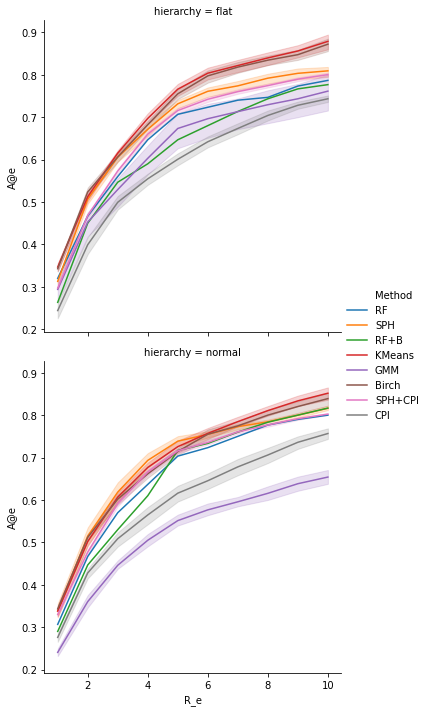

In [3]:
sns.relplot(data=flat_df, x="R_e", y="A@e", hue="Method", row="hierarchy", kind="line")

In [22]:
parameters = ["max info loss", "gini", "p value", "n_clusters"]
methods_to_parameters = {
    "SPH+CPI": ["max info loss", "gini", "p value"],
    "SPH": ["max info loss"],
    "KMeans": ["n_clusters"],
    "Birch": ["n_clusters"],
    "GMM": ["n_clusters"],
    "CPI": ["gini", "p value"],
    "RF": [],
    "RF+B": []
}

In [23]:
best_result_df = pd.DataFrame()
for n in flat_df["hierarchy"].unique():
    hierarchy_flat_df = flat_df[flat_df["hierarchy"] == n]
    # find best parameter for each method
    print(hierarchy_flat_df["Method"].unique())
    for method in hierarchy_flat_df["Method"].unique():
        method_df = hierarchy_flat_df[hierarchy_flat_df["Method"] == method]
        #print(method_df)
        first_position_df = method_df[(method_df["R_e"] == 1)]
        best_method_result = first_position_df[first_position_df["A@e"] == first_position_df["A@e"].max()]
        print(method)
        for parameter in methods_to_parameters[method]:
            parameter_value = best_method_result[parameter].values[0]
            if not parameter_value:
                continue
            method_df = method_df[method_df[parameter] == parameter_value]
        print(method_df)
        best_result_df = pd.concat([best_result_df, method_df])
best_result_df

['RF', 'SPH', 'SPH+CPI', 'CPI']
Categories (4, object): ['RF' < 'SPH' < 'SPH+CPI' < 'CPI']
RF
  Method  R_e       A@e      RA@e  Run     n    f  max info loss  n_clusters  \
0     RF    1  0.320000  1.000000    1  1050  100            NaN         NaN   
1     RF    2  0.466667  1.314286    1  1050  100            NaN         NaN   
2     RF    3  0.560000  1.595238    1  1050  100            NaN         NaN   
3     RF    4  0.646667  1.917526    1  1050  100            NaN         NaN   
4     RF    5  0.706667  2.179245    1  1050  100            NaN         NaN   
5     RF    6  0.723333  2.267281    1  1050  100            NaN         NaN   
6     RF    7  0.740000  2.373874    1  1050  100            NaN         NaN   
7     RF    8  0.746667  2.424107    1  1050  100            NaN         NaN   
8     RF    9  0.773333  2.650862    1  1050  100            NaN         NaN   
9     RF   10  0.786667  2.775424    1  1050  100            NaN         NaN   

  algorithm  n_components

,Method,R_e,A@e,RA@e,Run,n,f,max info loss,n_clusters,algorithm,n_components,gini,p value,hierarchy
0,RF,1,0.320000,1.000000,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat
1,RF,2,0.466667,1.314286,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat
2,RF,3,0.560000,1.595238,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat
3,RF,4,0.646667,1.917526,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat
4,RF,5,0.706667,2.179245,1,1050,100,NaN,NaN,NaN,NaN,NaN,NaN,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,CPI,6,0.686667,2.262136,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.75,normal
4492,CPI,7,0.720000,2.481481,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.75,normal
4493,CPI,8,0.756667,2.748899,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.75,normal
4494,CPI,9,0.773333,2.883621,1,1050,100,NaN,NaN,NaN,NaN,0.2,0.75,normal


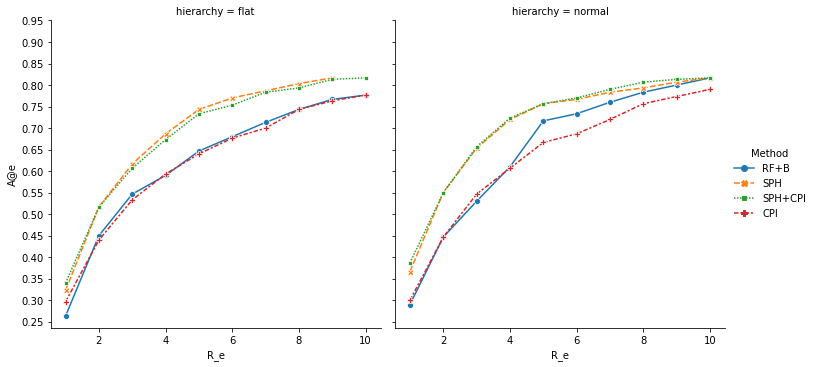

In [7]:
ax = sns.relplot(data=best_result_df, x="R_e", y="A@e", hue="Method", col="hierarchy", kind="line", markers=True, style="Method",col_wrap=2)
ax.set(yticks=[0.05*i for i in range(5, 20)])

Text(0, 0.5, 'A@1')

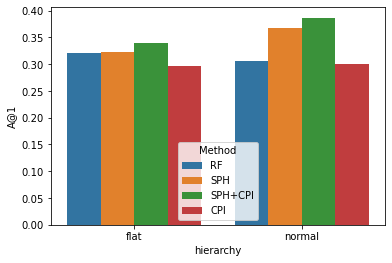

In [24]:
#ax = sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"])], x="R_e", y="A@e", hue="Method", col="hierarchy", kind="bar", markers=True, style="Method",col_wrap=2)
ax = sns.barplot(data=best_result_df[(best_result_df["R_e"] ==1)], x="hierarchy", y="A@e", hue="Method")
ax.set_ylabel("A@1")

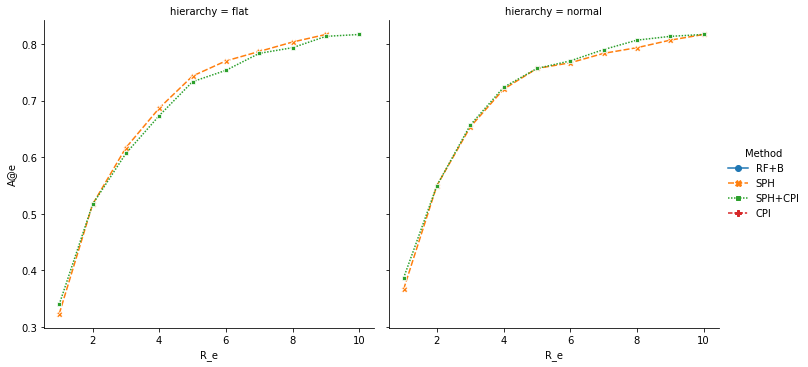

In [9]:
sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "KMeans", "Birch"])], x="R_e", y="A@e", hue="Method", style="Method", markers=True, col="hierarchy", kind="line", col_wrap=2)

Text(0, 0.5, 'A@1')

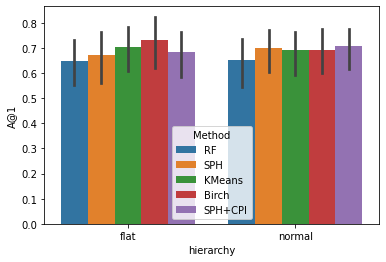

In [20]:
ax = sns.barplot(data=best_result_df[(best_result_df["R_e"] <=10) & (best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "KMeans", "Birch"]))], x="hierarchy", y="A@e", hue="Method")
ax.set_ylabel("A@1")

In [68]:
best_parameter_df = pd.DataFrame()
for n in best_result_df["n"].unique():
    #print("--------------------------------------")
    #print(f"n={n}")
    best_n_samples = best_result_df[best_result_df["n"] == n]
    for method in best_n_samples["Method"].unique():
        param_df = best_n_samples[(best_n_samples["Method"] == method) & (best_n_samples["R_e"] == 1)][methods_to_parameters[method]]
        #print(f"Method {method} has best parameters:")
        #print(param_df)
        #print("--------------------------------------")
        param_df["Method"] = method
        param_df["n"] = n
        best_parameter_df = pd.concat([best_parameter_df, param_df])
    
best_parameter_df

,max info loss,Method,n,n_clusters,gini,p value
28,0.25,SPH,500,NaN,NaN,NaN
61,NaN,RF,500,NaN,NaN,NaN
71,NaN,RF+B,500,NaN,NaN,NaN
101,NaN,KMeans,500,20.0,NaN,NaN
371,NaN,Birch,500,50.0,NaN,NaN
1856,0.40,SPH+CPI,500,NaN,0.20,0.70
2086,NaN,CPI,500,NaN,0.20,0.70
2386,0.35,SPH,1050,NaN,NaN,NaN
2406,NaN,RF,1050,NaN,NaN,NaN
2416,NaN,RF+B,1050,NaN,NaN,NaN
